## DATA2001 Assignment Report
### Jacob Whiteford (520351554), Carlos Gonzalez (530239167)

### Importing necessary libraries for importation

In [1]:
import csv
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon
from geoalchemy2 import Geometry, WKTElement
import matplotlib.pyplot as plt

### Importing Population Dataset (1/7)

In [2]:
### Population Dataset CSV Format
population = pd.read_csv("Population.csv")
print(population.info())

### Dropping obs where pop<100
population = population.loc[population["total_people"] >=100 ] 

### For analysis, we only need total population and 'young people (0-19)'
### Dropping additional age groups. 
population['0-19_people'] = population.iloc[:, 2:6].sum(axis=1) # Creating '0-19' col.
population = population.iloc[:, :2].join(population.iloc[:, 20:])
population

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   sa2_code            373 non-null    int64 
 1   sa2_name            373 non-null    object
 2   0-4_people          373 non-null    int64 
 3   5-9_people          373 non-null    int64 
 4   10-14_people        373 non-null    int64 
 5   15-19_people        373 non-null    int64 
 6   20-24_people        373 non-null    int64 
 7   25-29_people        373 non-null    int64 
 8   30-34_people        373 non-null    int64 
 9   35-39_people        373 non-null    int64 
 10  40-44_people        373 non-null    int64 
 11  45-49_people        373 non-null    int64 
 12  50-54_people        373 non-null    int64 
 13  55-59_people        373 non-null    int64 
 14  60-64_people        373 non-null    int64 
 15  65-69_people        373 non-null    int64 
 16  70-74_people        373 no

,sa2_code,sa2_name,total_people,0-19_people
0,102011028,Avoca Beach - Copacabana,7530,2121
1,102011029,Box Head - MacMasters Beach,11052,2471
2,102011030,Calga - Kulnura,4748,961
3,102011031,Erina - Green Point,14803,3205
4,102011032,Gosford - Springfield,21346,4364
...,...,...,...,...
367,128021536,Oyster Bay - Como - Jannali,22151,6212
369,128021538,Sutherland - Kirrawee,23369,5078
370,128021607,Engadine,17379,5118
371,128021608,Loftus - Yarrawarrah,7354,2073


### Importing future.shp Spatial Dataset (2/7)

In [3]:
### Found in the catchments.zip folder.
### Specifying the SRID using the WGS84 world geodetic coordinate system

future = gpd.read_file("catchments/catchments_future.shp")
print(future.info())

### Checking to see if dataframe contains null values
if future.isnull().any().any():
    print('The dataframe "future" contains null values')
else:
    print('The dataframe "future" does not contain any null values')
    # No Null Values 

### Changing Geom Type to (MultiPolygon)
srid = 4326
def create_wkt_element(geom, srid):
    if geom.geom_type == 'Polygon':
        geom = MultiPolygon([geom])
    return WKTElement(geom.wkt, srid)
futureog = future.copy()  # creating a copy of the original for later
future['geom'] = future['geometry'].apply(lambda x: create_wkt_element(geom=x,srid=srid))  # applying the function
future = future.drop(columns="geometry")  # deleting the old copy

### For analysis we do not need the YEAR# indicators, we will only keep:
### USE_ID, CATCH_TYPE, USE_DESC, ADD_DATE, geom
future = future.iloc[:, :4].join(future.iloc[:, 17:])
future

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   USE_ID      30 non-null     object  
 1   CATCH_TYPE  30 non-null     object  
 2   USE_DESC    30 non-null     object  
 3   ADD_DATE    30 non-null     object  
 4   KINDERGART  30 non-null     int64   
 5   YEAR1       30 non-null     int64   
 6   YEAR2       30 non-null     int64   
 7   YEAR3       30 non-null     int64   
 8   YEAR4       30 non-null     int64   
 9   YEAR5       30 non-null     int64   
 10  YEAR6       30 non-null     int64   
 11  YEAR7       30 non-null     int64   
 12  YEAR8       30 non-null     int64   
 13  YEAR9       30 non-null     int64   
 14  YEAR10      30 non-null     int64   
 15  YEAR11      30 non-null     int64   
 16  YEAR12      30 non-null     int64   
 17  geometry    30 non-null     geometry
dtypes: geometry(1), int64(13), object(4)
memory 

,USE_ID,CATCH_TYPE,USE_DESC,ADD_DATE,geom
0,8416,HIGH_COED,Ku-ring-gai HS,20230114,MULTIPOLYGON (((151.19848917708944 -33.5398987...
1,8161,HIGH_BOYS,Randwick BHS,20200220,MULTIPOLYGON (((151.27151530428182 -33.9140183...
2,8539,HIGH_COED,SSC Blackwattle Bay,20220609,MULTIPOLYGON (((151.15292370935092 -33.8393921...
3,8400,HIGH_COED,St Ives HS,20230114,MULTIPOLYGON (((151.17793729938725 -33.6982001...
4,8555,HIGH_COED,Rose Bay SC,20200220,MULTIPOLYGON (((151.28072275958445 -33.8328728...
5,8556,CENTRAL_HIGH,Alexandria Park CS,20200220,MULTIPOLYGON (((151.1949653506184 -33.88876468...
6,8913,HIGH_COED,Inner Sydney HS,20200220,MULTIPOLYGON (((151.2098245099502 -33.85422949...
7,8286,HIGH_COED,Mt Annan HS,20220301,MULTIPOLYGON (((150.77298245154256 -34.0251624...
8,8584,HIGH_COED,Elizabeth Macarthur HS,20220301,MULTIPOLYGON (((150.7323512413543 -34.01465804...
9,8290,HIGH_COED,John Edmondson HS,20190520,MULTIPOLYGON (((150.70497435250746 -33.9042617...


### Importing Primary.shp spatial data (3/9)

In [4]:
# Found in the catchments.zip folder.
# Specifying the SRID using the WGS84 world geodetic coordinate system

primary = gpd.read_file("catchments/catchments_primary.shp")
print(primary.info())


### Dropping Priority column, 
### only 4 entries had a non-null value, deemed unnecessary for latter analysis 
mask = primary['PRIORITY'].notnull()
result = primary[mask]
result
primary.drop('PRIORITY', axis=1, inplace=True)

### Creating a boolean mask of null values 
### Use the boolean mask to filter the column names that contain nulls
null_mask = primary.isna().any()
null_cols = null_mask[null_mask].index
print(null_cols)

### filling the add_date column with 0 
### (it is the only column containing null values and is not important for analysis)
primary.fillna(0, inplace=True)

### changing geom type to MultiPolygon 
srid = 4326
def create_wkt_element(geom, srid):
    if geom.geom_type == 'Polygon':
        geom = MultiPolygon([geom])
    return WKTElement(geom.wkt, srid)
primaryog = primary.copy()  # creating a copy of the original for later
primary['geom'] = primary['geometry'].apply(lambda x: create_wkt_element(geom=x,srid=srid))  # applying the function
primary = primary.drop(columns="geometry")  # deleting the old copy

### For analysis we do not need the YEAR# indicators, we will only keep:
### USE_ID, CATCH_TYPE, USE_DESC, ADD_DATE, geom
primary = primary.iloc[:, :4].join(primary.iloc[:, 17:])
primary

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1662 entries, 0 to 1661
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   USE_ID      1662 non-null   object  
 1   CATCH_TYPE  1662 non-null   object  
 2   USE_DESC    1662 non-null   object  
 3   ADD_DATE    1342 non-null   object  
 4   KINDERGART  1662 non-null   object  
 5   YEAR1       1662 non-null   object  
 6   YEAR2       1662 non-null   object  
 7   YEAR3       1662 non-null   object  
 8   YEAR4       1662 non-null   object  
 9   YEAR5       1662 non-null   object  
 10  YEAR6       1662 non-null   object  
 11  YEAR7       1662 non-null   object  
 12  YEAR8       1662 non-null   object  
 13  YEAR9       1662 non-null   object  
 14  YEAR10      1662 non-null   object  
 15  YEAR11      1662 non-null   object  
 16  YEAR12      1662 non-null   object  
 17  PRIORITY    4 non-null      object  
 18  geometry    1662 non-null   geometry
dty

,USE_ID,CATCH_TYPE,USE_DESC,ADD_DATE,geom
0,2404,PRIMARY,Lindfield EPS,20211219,MULTIPOLYGON (((151.1833640465581 -33.74748398...
1,4393,PRIMARY,Carlingford WPS,20220223,MULTIPOLYGON (((151.0451821055135 -33.77303212...
2,4615,PRIMARY,Caddies Ck PS,20181210,MULTIPOLYGON (((150.92567327976582 -33.7296030...
3,3918,PRIMARY,Killara PS,20211219,MULTIPOLYGON (((151.1537883781186 -33.75586174...
4,3396,PRIMARY,Waterfall PS,0,MULTIPOLYGON (((150.94786340261896 -34.1059463...
...,...,...,...,...,...
1657,4383,PRIMARY,E A Southee PS,20200315,MULTIPOLYGON (((147.9462089946497 -34.55863148...
1658,3275,PRIMARY,Tumbarumba PS,20200507,MULTIPOLYGON (((148.12885348977485 -35.6008184...
1659,2239,PRIMARY,Jindera PS,20200507,MULTIPOLYGON (((146.86147943204122 -35.8751106...
1660,3594,PRIMARY,Louth PS,20200604,MULTIPOLYGON (((145.18402754685187 -29.6580498...


### Importing Secondary.shp Spatial Data (4/9)

In [5]:
# Found in the catchments.zip folder.
# Specifying the SRID using the WGS84 world geodetic coordinate system
secondary = gpd.read_file("catchments/catchments_secondary.shp")
print(secondary.info())

### Dropping Priority column,
### Only 7 entries had a non-null value, deemed unnecessary for latter analysis 
mask = secondary['PRIORITY'].notnull()
result = secondary[mask]
result
secondary.drop('PRIORITY', axis=1, inplace=True)

### Creating a boolean mask of null values,
### Use the boolean mask to filter the column names that contain nulls
null_mask = secondary.isna().any()
null_cols = null_mask[null_mask].index
print(null_cols)

### Filling the add_date column with 0 
### (it is the only column containing null values and is not important for analysis)
secondary.fillna(0, inplace=True)

### Changing geom type to MultiPolygon 
srid = 4326
def create_wkt_element(geom, srid):
    if geom.geom_type == 'Polygon':
        geom = MultiPolygon([geom])
    return WKTElement(geom.wkt, srid)
secondaryog = secondary.copy()  # creating a copy of the original for later
secondary['geom'] = secondary['geometry'].apply(lambda x: create_wkt_element(geom=x,srid=srid))  # applying the function
secondary = secondary.drop(columns="geometry")  # deleting the old copy

### For analysis we do not need the YEAR# indicators, we will only keep:
### USE_ID, CATCH_TYPE, USE_DESC, ADD_DATE, geom
secondary = secondary.iloc[:, :4].join(secondary.iloc[:, 17:])
secondary

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   USE_ID      436 non-null    object  
 1   CATCH_TYPE  436 non-null    object  
 2   USE_DESC    436 non-null    object  
 3   ADD_DATE    372 non-null    object  
 4   KINDERGART  436 non-null    object  
 5   YEAR1       436 non-null    object  
 6   YEAR2       436 non-null    object  
 7   YEAR3       436 non-null    object  
 8   YEAR4       436 non-null    object  
 9   YEAR5       436 non-null    object  
 10  YEAR6       436 non-null    object  
 11  YEAR7       436 non-null    object  
 12  YEAR8       436 non-null    object  
 13  YEAR9       436 non-null    object  
 14  YEAR10      436 non-null    object  
 15  YEAR11      436 non-null    object  
 16  YEAR12      436 non-null    object  
 17  PRIORITY    7 non-null      object  
 18  geometry    436 non-null    geometry
dtype

,USE_ID,CATCH_TYPE,USE_DESC,ADD_DATE,geom
0,8503,HIGH_COED,Billabong HS,20200507,MULTIPOLYGON (((146.67182402032344 -35.3144375...
1,8266,HIGH_COED,James Fallon HS,20200507,MULTIPOLYGON (((147.08733806259178 -35.8627146...
2,8505,HIGH_COED,Murray HS,20200507,MULTIPOLYGON (((146.81447829547324 -35.7834062...
3,8458,HIGH_COED,Kingswood HS,20201016,MULTIPOLYGON (((150.68599834118749 -33.7403060...
4,8559,HIGH_COED,Jamison HS,20201016,MULTIPOLYGON (((150.69513440644116 -33.7562688...
...,...,...,...,...,...
431,8213,HIGH_BOYS,Birrong BHS,20211221,MULTIPOLYGON (((151.05363508494244 -33.8507612...
432,8108,HIGH_COED,Cessnock HS,20230405,MULTIPOLYGON (((151.4285214252146 -32.74415247...
433,3235,CENTRAL_HIGH,Tooleybuc CS,20200512,MULTIPOLYGON (((143.37723402388323 -34.8017260...
434,1115,CENTRAL_HIGH,Balranald CS,20200512,MULTIPOLYGON (((143.65540852703225 -33.5570248...


### Import  "SA2 Regions" Spatial Dataset (5/9) 

In [6]:
### We will drop any values not including Sydney 
### (double checked to make sure that only greater sydney has been included)

sa2 = gpd.read_file("SA2_2021_AUST_SHP_GDA2020/SA2_2021_AUST_GDA2020.shp")
sa2 = sa2[sa2['geometry'].notna()]
unique_sa4_names = sa2['GCC_NAME21'].unique()
print(unique_sa4_names) # We will only keep obs with sa_4code21 = 'Greater Sydney'
sa2_sydney = sa2[sa2['GCC_NAME21'].str.contains('Greater Sydney', case=False)]

### Dropping columns that will not be used for analysis. 
sa2_sydney = sa2_sydney.drop(['CHG_FLAG21', 'CHG_LBL21', 'SA3_CODE21', 
                              'STE_CODE21', 'SA4_CODE21', 'SA4_NAME21', 
                              'AUS_CODE21', 'AUS_NAME21', 'AREASQKM21', 
                              'LOCI_URI21', 'GCC_CODE21'], axis=1)

### Changing geom type to MultiPolygon 
srid = 4326
def create_wkt_element(geom, srid):
    if geom.geom_type == 'Polygon':
        geom = MultiPolygon([geom])
    return WKTElement(geom.wkt, srid)
sa2og = sa2_sydney.copy()  # creating a copy of the original for later
sa2_sydney['geom'] = sa2_sydney['geometry'].apply(lambda x: create_wkt_element(geom=x,srid=srid))  # applying the function
sa2_sydney1 = sa2_sydney.drop(columns="geometry")  # deleting the old copy
sa2_sydney1

['Rest of NSW' 'Greater Sydney' 'Rest of Vic.' 'Greater Melbourne'
 'Greater Brisbane' 'Rest of Qld' 'Greater Adelaide' 'Rest of SA'
 'Rest of WA' 'Greater Perth' 'Greater Hobart' 'Rest of Tas.'
 'Greater Darwin' 'Rest of NT' 'Australian Capital Territory'
 'Other Territories']


,SA2_CODE21,SA2_NAME21,SA3_NAME21,GCC_NAME21,STE_NAME21,geom
28,102011028,Avoca Beach - Copacabana,Gosford,Greater Sydney,New South Wales,MULTIPOLYGON (((151.413733024921 -33.465580583...
29,102011029,Box Head - MacMasters Beach,Gosford,Greater Sydney,New South Wales,MULTIPOLYGON (((151.37484081570685 -33.5005199...
30,102011030,Calga - Kulnura,Gosford,Greater Sydney,New South Wales,MULTIPOLYGON (((151.20449037540152 -33.5328022...
31,102011031,Erina - Green Point,Gosford,Greater Sydney,New South Wales,MULTIPOLYGON (((151.37193611462118 -33.4369790...
32,102011032,Gosford - Springfield,Gosford,Greater Sydney,New South Wales,MULTIPOLYGON (((151.32348639265098 -33.4277852...
...,...,...,...,...,...,...
637,128021537,Royal National Park,Sutherland - Menai - Heathcote,Greater Sydney,New South Wales,MULTIPOLYGON (((151.07362997413264 -34.0563789...
638,128021538,Sutherland - Kirrawee,Sutherland - Menai - Heathcote,Greater Sydney,New South Wales,MULTIPOLYGON (((151.05006441218998 -34.0215774...
639,128021607,Engadine,Sutherland - Menai - Heathcote,Greater Sydney,New South Wales,MULTIPOLYGON (((150.99568346574816 -34.0536082...
640,128021608,Loftus - Yarrawarrah,Sutherland - Menai - Heathcote,Greater Sydney,New South Wales,MULTIPOLYGON (((151.03954821100714 -34.0417452...


### Importing Business.csv Dataset (6/9)

In [7]:
### Importing business.csv. 
### Some Values are set as 'Currently Unknown' as NaN
missing_values = ["--","<Null>", "Currently Unknown"] #classifying as NaN
biz_df = pd.read_csv("Businesses.csv" , na_values = missing_values)
print(biz_df.info()) #Data types

### Checking for NA and creating a df of just the nan
biz_df.isnull().values.any() #
biz_df.isnull().sum()
null_data = biz_df[biz_df.isnull().any(axis=1)].index
null_data

### Dropping observations above (dropping the null_data df), not relevant for analysis
biz_df.drop(null_data, inplace=True)

# ##For Analysis we will organize 
# Dropping observations in column industry_name other than those that contain the words retail or health
retail = biz_df[biz_df['industry_name'].str.contains('retail', case=False)]

health = biz_df[biz_df['industry_name'].str.contains('health', case=False)]

# Dropping columns that will not be used for analysis

retail = retail.drop(['0_to_50k_businesses', '50k_to_200k_businesses',
                        '200k_to_2m_businesses','2m_to_5m_businesses', 
                        '5m_to_10m_businesses','10m_or_more_businesses'], axis=1)

health = health.drop(['0_to_50k_businesses', '50k_to_200k_businesses',
                        '200k_to_2m_businesses','2m_to_5m_businesses', 
                        '5m_to_10m_businesses','10m_or_more_businesses'], axis=1)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12217 entries, 0 to 12216
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   industry_code           12217 non-null  object
 1   industry_name           12217 non-null  object
 2   sa2_code                12217 non-null  int64 
 3   sa2_name                12198 non-null  object
 4   0_to_50k_businesses     12217 non-null  int64 
 5   50k_to_200k_businesses  12217 non-null  int64 
 6   200k_to_2m_businesses   12217 non-null  int64 
 7   2m_to_5m_businesses     12217 non-null  int64 
 8   5m_to_10m_businesses    12217 non-null  int64 
 9   10m_or_more_businesses  12217 non-null  int64 
 10  total_businesses        12217 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 1.0+ MB
None


### Importing pollingplaces2019 dataset, dropped rows without geospatial point data, changed the geom point data

In [8]:
poll=pd.read_csv("PollingPlaces2019.csv")

### Dropping rows without geospatial point data
null_geom_rows = poll[poll['the_geom'].isnull()]
#print(null_geom_rows)
poll = poll.dropna(subset=['the_geom'])
poll = poll.rename(columns={'the_geom': 'geometry'})

### Dropping the following 3 columns as they are not necessary for analytical purposes
poll = poll.drop(columns=['premises_address_1', 'premises_address_2', 'premises_address_3', 
                         'state', 'division_id', 'division_name', 'polling_place_id',
                         'polling_place_name', 'premises_name', 'premises_state_abbreviation', 
                         'premises_post_code', 'polling_place_type_id'])
poll['geom'] = gpd.points_from_xy(poll.longitude, poll.latitude)  # creating the geometry column
poll = poll.drop(columns=['latitude', 'longitude', 'geometry'])  # removing the old latitude/longitude and geometry fields
srid = 4326 
poll['geom'] = poll['geom'].apply(lambda x: WKTElement(x.wkt, srid=srid))
poll.head(100)

#2790

,FID,premises_suburb,geom
13,aec_federal_election_polling_places_2019.fid-4...,OATLEY,POINT (151.081 -33.9847)
15,aec_federal_election_polling_places_2019.fid-4...,DHARRUK,POINT (150.817 -33.7475)
16,aec_federal_election_polling_places_2019.fid-4...,ALLAWAH,POINT (151.1148974 -33.9767897)
17,aec_federal_election_polling_places_2019.fid-4...,SOUTH HURSTVILLE,POINT (151.111 -33.9756)
18,aec_federal_election_polling_places_2019.fid-4...,BEVERLY HILLS,POINT (151.075 -33.9413)
...,...,...,...
110,aec_federal_election_polling_places_2019.fid-4...,ROCKDALE,POINT (151.136 -33.9504)
111,aec_federal_election_polling_places_2019.fid-4...,SYDNEY,POINT (151.2064528 -33.8730501)
112,aec_federal_election_polling_places_2019.fid-4...,SYDNEY,POINT (151.2092587 -33.8638565)
113,aec_federal_election_polling_places_2019.fid-4...,TEMPE,POINT (151.1610947 -33.919948)


### Importing stops dataset, converted latitude and longtitude to geom point data.

In [9]:
stops=pd.read_csv("Stops.txt",sep=',')
stops['geom'] = gpd.points_from_xy(stops.stop_lon, stops.stop_lat)  # creating the geometry column
stops = stops.drop(columns=['stop_lat', 'stop_lon', 'wheelchair_boarding', 
                            'platform_code', 'location_type','stop_code', 'parent_station']) 
                            # removing the old latitude/longitude fields and useless columns
srid = 4326 
stops['geom'] = stops['geom'].apply(lambda x: WKTElement(x.wkt, srid=srid))
stops

,stop_id,stop_name,geom
0,200039,"Central Station, Eddy Av, Stand A",POINT (151.20666465471 -33.8822064874687)
1,200054,"Central Station, Eddy Av, Stand D",POINT (151.20699145565 -33.8820421431408)
2,200060,Central Station,POINT (151.206292455081 -33.8840842535493)
3,201510,Redfern Station,POINT (151.198866071817 -33.8916900512711)
4,201646,"Redfern Station, Gibbons St, Stand B",POINT (151.198881722942 -33.8933293130144)
...,...,...,...
114713,212753,"Sydney Olympic Park Wharf, Side B",POINT (151.07879697831 -33.8220164586429)
114714,2137185,"Cabarita Wharf, Side A",POINT (151.116926480557 -33.8406690716775)
114715,2137186,"Cabarita Wharf, Side B",POINT (151.116898892402 -33.8407691073139)
114716,21501,Parramatta Wharf,POINT (151.010576673346 -33.8139042429414)


### Task 3: Extra Data Set: Carlos (Fire Station Locations)

In [10]:
from bs4 import BeautifulSoup

# Parse the XML file
with open('fire.php.rss') as f:
    soup = BeautifulSoup(f, 'xml')

# Access elements in the XML tree
# We will only b using the name and geom information
data = []
for item in soup.find_all('item'):
    row = {}
    row['title'] = item.title.string
    row['geo:long'] = item.long.string
    row['geo:lat'] = item.lat.string
    
    data.append(row)

# Convert to pandas df
fire = pd.DataFrame(data)

# Geom changing from coordinates to geom column and WKTE
fire = fire.rename(columns={'geo:lat': 'latitude', 'geo:long': 'longitude'})
fire['geom'] = gpd.points_from_xy(fire.longitude, fire.latitude) 
fire = fire.drop(columns=['latitude', 'longitude'])
srid = 4326 
fire['geom'] = fire['geom'].apply(lambda x: WKTElement(x.wkt, srid=srid))
fire

,title,geom
0,"208, Aberdeen Fire Station",POINT (150.8895 -32.163335)
1,"202, Abermain Fire Station",POINT (151.43185 -32.811131)
2,"207, Albion Park Fire Station",POINT (150.774547 -34.572809)
3,"203, Albury Central Fire Station",POINT (146.930701 -36.065825)
4,"209, Albury Civic Fire Station",POINT (146.915934 -36.077125)
...,...,...
330,"513, Young Fire Station",POINT (148.29833 -34.312987)
331,"353, Kincumber Fire Station",POINT (151.398848891258 -33.4789858990531)
332,"440, Shoalhaven Fire Station",POINT (150.579801 -34.915118)
333,"448, South Tamworth Fire Station",POINT (150.922635 -31.126902)


### TASK 3: Extra Data Set: Jacob (Alcohol Related Assault Spatial Dataset)

In [11]:
alcohol = gpd.read_file("crime/AlcoholRelatedAssault_JanToDec2021.shp")
alcohol

# checking to see if alcohol dataset contains null values
if alcohol.isnull().any().any():
    print('The dataframe "alcohol" contains null values')
else:
    print('The dataframe "alcohol" does not contain any null values')
srid = 4326

# converting geomtry data into Multipolygon
def create_wkt_element(geom, srid):
    if geom.geom_type == 'Polygon':
        geom = MultiPolygon([geom])
    return WKTElement(geom.wkt, srid)
alcohol = alcohol.copy()  # creating a copy of the original for later
alcohol['geom'] = alcohol['geometry'].apply(lambda x: create_wkt_element(geom=x,srid=srid))  # applying the function
alcohol = alcohol.drop(columns=["geometry","Shape_Leng", "Shape_Area"])  # deleting the old copy
alcohol

The dataframe "alcohol" does not contain any null values


,OBJECTID,Contour,Density,ORIG_FID,geom
0,1,8.0,Low Density,1,MULTIPOLYGON (((149.9032281520001 -37.05964366...
1,2,8.0,Low Density,1,MULTIPOLYGON (((149.89945564900006 -37.0480240...
2,3,8.0,Low Density,1,MULTIPOLYGON (((149.91090795600007 -36.8766940...
3,4,8.0,Low Density,1,MULTIPOLYGON (((149.98238207800011 -36.7273759...
4,5,8.0,Low Density,1,MULTIPOLYGON (((149.84089292300007 -36.6792127...
...,...,...,...,...,...
1687,1688,10.0,High Density,3,MULTIPOLYGON (((153.28087340600007 -28.8048651...
1688,1689,10.0,High Density,3,MULTIPOLYGON (((153.61351783100008 -28.6379028...
1689,1690,10.0,High Density,3,MULTIPOLYGON (((153.2234958990001 -28.59278259...
1690,1691,10.0,High Density,3,MULTIPOLYGON (((153.5393017980001 -28.19068997...


### CONNECTION TO SQL SERVER

In [12]:
from sqlalchemy import create_engine
import psycopg2
import psycopg2.extras
import json

credentials = "Credentials.json"

def pgconnect(credential_filepath, db_schema="public"):
    with open(credential_filepath) as f:
        db_conn_dict = json.load(f)
        host       = db_conn_dict['host']
        db_user    = db_conn_dict['user']
        db_pw      = db_conn_dict['password']
        default_db = db_conn_dict['user']
        try:
            db = create_engine('postgresql+psycopg2://'+db_user+':'+db_pw+'@'+host+'/'+default_db, echo=False)
            conn = db.connect()
            print('Connected successfully.')
        except Exception as e:
            print("Unable to connect to the database.")
            print(e)
            db, conn = None, None
        return db,conn

def query(conn, sqlcmd, args=None, df=True):
    result = pd.DataFrame() if df else None
    try:
        if df:
            result = pd.read_sql_query(sqlcmd, conn, params=args)
        else:
            result = conn.execute(sqlcmd, args).fetchall()
            result = result[0] if len(result) == 1 else result
    except Exception as e:
        print("Error encountered: ", e, sep='\n')
    return result

db, conn = pgconnect(credentials)

query(conn, "select PostGIS_Version()")

Connected successfully.


,postgis_version
0,3.3 USE_GEOS=1 USE_PROJ=1 USE_STATS=1


## Table Schemas

In [13]:
##sa2 table
conn.execute("""
DROP TABLE IF EXISTS sa2 CASCADE;
CREATE TABLE sa2 (
    "SA2_CODE21" INTEGER PRIMARY KEY,
    "SA2_NAME21" VARCHAR(45),
    "SA3_NAME21" VARCHAR(40),
    "GCC_NAME21" VARCHAR(15),
    "STE_NAME21" VARCHAR(15),
    geom GEOMETRY(MULTIPOLYGON,4326),
    FOREIGN KEY ("SA2_CODE21") REFERENCES population(sa2_code)
);"""
            )

## Population Table

conn.execute("""
DROP TABLE IF EXISTS population CASCADE;
CREATE TABLE population (
     sa2_code INTEGER PRIMARY KEY, 
     sa2_name VARCHAR(100), 
     total_people NUMERIC,
     "0-19_people" NUMERIC
 );"""
 )


## future Table
conn.execute("""
DROP TABLE IF EXISTS future CASCADE;
CREATE TABLE future (
    "USE_ID" INTEGER PRIMARY KEY, 
    "CATCH_TYPE" VARCHAR(20), 
    "USE_DESC" VARCHAR(40),
    "ADD_DATE" INTEGER,
    geom GEOMETRY(MULTIPOLYGON,4326)
);"""
)


## primaryStuff Table

conn.execute("""
DROP TABLE IF EXISTS primarystuff CASCADE;
CREATE TABLE primarystuff (
    "USE_ID" INTEGER PRIMARY KEY, 
    "CATCH_TYPE" VARCHAR(20), 
    "USE_DESC" VARCHAR(40),
    "ADD_DATE" INTEGER,
    geom GEOMETRY(MULTIPOLYGON,4326)
);"""
)


## secondary Table

conn.execute("""
DROP TABLE IF EXISTS secondary CASCADE;
CREATE TABLE secondary (
    "USE_ID" INTEGER PRIMARY KEY, 
    "CATCH_TYPE" VARCHAR(20), 
    "USE_DESC" VARCHAR(40),
    "ADD_DATE" INTEGER,
    geom GEOMETRY(MULTIPOLYGON,4326)
);"""
)

## retail Table

conn.execute("""
DROP TABLE IF EXISTS retail CASCADE;
CREATE TABLE retail (
    INDUSTRY_CODE VARCHAR(1), 
    INDUSTRY_NAME VARCHAR(50), 
    SA2_CODE INTEGER PRIMARY KEY,
    SA2_NAME VARCHAR(50),
    TOTAL_BUSINESSES INTEGER
);"""
)

## health Table

conn.execute("""
DROP TABLE IF EXISTS health CASCADE;
CREATE TABLE health (
    INDUSTRY_CODE VARCHAR(1), 
    INDUSTRY_NAME VARCHAR(50), 
    SA2_CODE INTEGER PRIMARY KEY,
    SA2_NAME VARCHAR(50),
    TOTAL_BUSINESSES INTEGER,
    FOREIGN KEY (SA2_CODE) REFERENCES retail(sa2_code)
);"""
)

## stops Table
conn.execute("""
DROP TABLE IF EXISTS stops CASCADE;
CREATE TABLE stops (
    stop_id VARCHAR(10) PRIMARY KEY,
    stop_name VARCHAR(80),
    geom GEOMETRY(POINT,4326)
);"""
)


## polling Table
conn.execute("""
DROP TABLE IF EXISTS poll CASCADE;
CREATE TABLE poll (
    "FID" VARCHAR(90) PRIMARY KEY,
    premises_suburb VARCHAR(54),
    "geom" GEOMETRY(POINT,4326)
);"""
)

## Alcohol table (Jacob's Additional Data Set)
conn.execute("""
DROP TABLE IF EXISTS alcohol CASCADE;
CREATE TABLE alcohol (
     "OBJECTID" INTEGER PRIMARY KEY, 
     "Contour" NUMERIC, 
     "Density" VARCHAR(16),
     "ORIG_FID" INTEGER,
    geom GEOMETRY(MULTIPOLYGON,4326)
 );"""
 )

## Fire Station table (Carlos' Additional Data Set)
conn.execute("""
DROP TABLE IF EXISTS fire ;
CREATE TABLE fire (
     title VARCHAR(60) PRIMARY KEY,
     geom GEOMETRY(POINT,4326)
 );"""
 )

In [14]:
## Adding data into SQL SERVER

alcohol.to_sql("alcohol", conn, if_exists='append', index=False, dtype={'geom': Geometry('MULTIPOLYGON', srid)})
#query(conn, "select * from alcohol")

fire.to_sql('fire', conn, if_exists='append', index=False, dtype={'geom': Geometry('POINT', srid)})
#query(conn, "select * from fire")

future.to_sql('future', conn, if_exists='append', index=False, dtype={'geom': Geometry('MULTIPOLYGON', srid)})
#query(conn, "select * from futuredata")

primary.to_sql('primarystuff', conn, if_exists='append', index=False, dtype={'geom': Geometry('MULTIPOLYGON', srid)})
#query(conn, "select * from primarystuff")

secondary.to_sql('secondary', conn, if_exists='append', index=False, dtype={'geom': Geometry('MULTIPOLYGON', srid)})
#query(conn, "select * from secondary")

poll.to_sql('poll', conn, if_exists='append', index=False, dtype={'geom': Geometry('POINT', srid)})
#query(conn, "select * from poll")

stops.to_sql('stops', conn, if_exists='append', index=False, dtype={'geom': Geometry('POINT', srid)})

retail.to_sql("retail", con=conn, if_exists='append', index=False)
#query(conn, "select * from retail")

health.to_sql("health", con=conn, if_exists='append', index=False)
#query(conn, "select * from health")

population.to_sql("population", con=conn, if_exists='append', index=False)
#query(conn, "select * from population")'

sa2_sydney1.to_sql("sa2", conn, if_exists='append', index=False, dtype={'geom': Geometry('MULTIPOLYGON', srid)})
#query(conn, "select * from sa2")

373

In [15]:
# INDEXES
# Decided to make them based on their geometry (GIST)
# Definitely helped particularly for the stops table
sql = """
DROP INDEX IF EXISTS stops_geom_idx; 
CREATE INDEX stops_geom_idx ON stops USING GIST (geom);

DROP INDEX IF EXISTS primarystuff_geom_idx; 
CREATE INDEX primarystuff_geom_idx ON stops USING GIST (geom) ;

DROP INDEX IF EXISTS future_geom_idx; 
CREATE INDEX future_geom_idx ON stops USING GIST (geom) ;

DROP INDEX IF EXISTS secondary_geom_idx; 
CREATE INDEX secondary_geom_idx ON stops USING GIST (geom) ;
"""
query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


#### Alcohol

In [16]:
sql = """
DROP VIEW IF EXISTS alcohol_counts CASCADE;
CREATE VIEW alcohol_counts AS (
SELECT sa2."SA2_CODE21", sa2."SA2_NAME21", 
       COUNT(alcohol."OBJECTID") as alcohol_incident_count,
       (COUNT(alcohol."OBJECTID") / population.total_people) * 1000 
	   as "Alcohol Related Assaults per 1000"
FROM sa2
LEFT JOIN Alcohol  ON ST_CONTAINS(sa2.geom, alcohol.geom)
INNER JOIN population population ON sa2."SA2_CODE21" = population.sa2_code
GROUP BY sa2."SA2_CODE21", sa2."SA2_NAME21", population.total_people
ORDER BY "Alcohol Related Assaults per 1000" 
);

SELECT * from alcohol_counts
"""
query(conn, sql)

,SA2_CODE21,SA2_NAME21,alcohol_incident_count,Alcohol Related Assaults per 1000
0,128021609,Woronora Heights,0,0.000000
1,102011037,Point Clare - Koolewong,0,0.000000
2,102021049,Jilliby - Yarramalong,0,0.000000
3,102021051,Ourimbah - Fountaindale,0,0.000000
4,102021055,Tuggerah - Kangy Angy,0,0.000000
...,...,...,...,...
355,123021443,Minto - St Andrews,9,0.418216
356,123021706,Macquarie Fields,6,0.420757
357,116021630,Riverstone,7,0.503416
358,102021046,Budgewoi - Buff Point - Halekulani,5,0.510830


In [17]:
#Alchohol Assault STATS
sql = """
DROP VIEW IF EXISTS alcohol_z;
CREATE VIEW alcohol_z AS
with stats as (
    SELECT AVG("Alcohol Related Assaults per 1000") as mean, STDDEV("Alcohol Related Assaults per 1000") as stddev
    from alcohol_counts
)

select "SA2_CODE21", "SA2_NAME21" ,("Alcohol Related Assaults per 1000"-mean)/stddev as "Z-Alcohol" 
from alcohol_counts cross join stats;

SELECT * FROM alcohol_z
"""
query(conn, sql)

,SA2_CODE21,SA2_NAME21,Z-Alcohol
0,128021609,Woronora Heights,-0.734444
1,102011037,Point Clare - Koolewong,-0.734444
2,102021049,Jilliby - Yarramalong,-0.734444
3,102021051,Ourimbah - Fountaindale,-0.734444
4,102021055,Tuggerah - Kangy Angy,-0.734444
...,...,...,...
355,123021443,Minto - St Andrews,3.204509
356,123021706,Macquarie Fields,3.228449
357,116021630,Riverstone,4.006967
358,102021046,Budgewoi - Buff Point - Halekulani,4.076792


#### Fire Stations 

In [18]:
# Fire Station VIEW
sql = """
DROP VIEW IF EXISTS fires_counts;
CREATE VIEW fires_counts AS
SELECT sa2."SA2_CODE21", sa2."SA2_NAME21", 
       COUNT(fire.title) as fire_station_count,
       (COUNT(fire.title) / population.total_people) * 1000 as "Fire Stations per 1000"
FROM SA2 sa2
LEFT JOIN FIRE fire ON ST_INTERSECTS(sa2.geom, fire.geom)
INNER JOIN population population ON sa2."SA2_CODE21" = population.sa2_code
GROUP BY sa2."SA2_CODE21", sa2."SA2_NAME21", population.total_people
ORDER BY "Fire Stations per 1000" DESC;

"""
query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [19]:
# Fire Station Statistics
sql = """
DROP VIEW IF EXISTS fires_z;
CREATE VIEW fires_z AS
with stats as (
    SELECT AVG("Fire Stations per 1000") as mean, STDDEV("Fire Stations per 1000") as stddev
    from fires_counts
)

select "SA2_CODE21", "SA2_NAME21",("Fire Stations per 1000"-mean)/stddev as "Z-Fire Stations" 
from fires_counts cross join stats;
select * from fires_z
"""
query(conn, sql)

,SA2_CODE21,SA2_NAME21,Z-Fire Stations
0,124011449,Blackheath - Megalong Valley,8.137893
1,124031465,Warragamba - Silverdale,3.570661
2,124011455,Wentworth Falls,3.323886
3,123011698,Currans Hill,3.290244
4,102011033,Kariong,3.274821
...,...,...,...
355,120011383,Concord - Mortlake - Cabarita,-0.576198
356,120011386,Five Dock - Abbotsford,-0.576198
357,120021389,Lilyfield - Rozelle,-0.576198
358,120021674,Annandale (NSW),-0.576198


#### Health Businesses

In [20]:
# Health Businesses VIEW
sql = """
DROP VIEW IF EXISTS healthbiz CASCADE;
CREATE VIEW healthbiz as(
SELECT "SA2_CODE21", "SA2_NAME21", (total_businesses/total_people)*1000 as "Health Businesses per 1000"
FROM sa2
LEFT JOIN health ON (sa2."SA2_CODE21"=health.sa2_code)
LEFT JOIN population ON (sa2."SA2_CODE21"=population.sa2_code)
WHERE (total_people/1000) IS NOT NULL
ORDER by "Health Businesses per 1000"
)
"""
query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [21]:
# Health Businesses STATS
sql = """
DROP VIEW IF EXISTS health_z CASCADE;
CREATE VIEW health_z AS
with stats as (
    SELECT AVG("Health Businesses per 1000") as mean, STDDEV("Health Businesses per 1000") as stddev
    from healthbiz
)

select "SA2_CODE21", "SA2_NAME21" ,("Health Businesses per 1000"-mean)/stddev as "Z-Health Business" 
from healthbiz cross join stats;

SELECT * FROM health_z
"""
query(conn, sql)

,SA2_CODE21,SA2_NAME21,Z-Health Business
0,124031465,Warragamba - Silverdale,-0.870113
1,115031299,Bilpin - Colo - St Albans,-0.862760
2,124031457,Cambridge Park,-0.847067
3,124041468,Yarramundi - Londonderry,-0.780839
4,102021045,Blue Haven - San Remo,-0.776247
...,...,...,...
355,121011401,St Leonards - Naremburn,2.417876
356,118011650,Double Bay - Darling Point,2.660958
357,118011341,Bondi Junction - Waverly,2.662693
358,115011291,Baulkham Hills (West) - Bella Vista,2.809651


#### Retail Businesses

In [22]:
# Retail Businesses VIEW
sql = """
DROP VIEW IF EXISTS retail_biz CASCADE;
CREATE VIEW retail_biz as(
SELECT "SA2_CODE21", "SA2_NAME21", (total_businesses/total_people)*1000 as "Retail Businesses per 1000"
FROM sa2
LEFT JOIN retail ON (sa2."SA2_CODE21"=retail.sa2_code)
LEFT JOIN population ON (sa2."SA2_CODE21"=population.sa2_code)
WHERE (total_people/1000) IS NOT NULL
ORDER by "Retail Businesses per 1000"
)
"""
query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [23]:
# Retail Businesses STATS
sql = """
DROP VIEW IF EXISTS retail_z CASCADE;
CREATE VIEW retail_z AS
WITH stats AS (
    SELECT AVG("Retail Businesses per 1000") AS mean, STDDEV("Retail Businesses per 1000") AS stddev
    FROM retail_biz
)
SELECT "SA2_CODE21", "SA2_NAME21" ,("Retail Businesses per 1000"-mean)/stddev AS "Z-Retail Business" 
FROM retail_biz 
CROSS JOIN stats;
select * from retail_z
"""
query(conn, sql)

,SA2_CODE21,SA2_NAME21,Z-Retail Business
0,102011035,Narara,-0.584813
1,102021045,Blue Haven - San Remo,-0.571847
2,124031457,Cambridge Park,-0.540209
3,102021050,Lake Munmorah - Mannering Park,-0.536301
4,116031316,Lethbridge Park - Tregear,-0.529916
...,...,...,...
355,117031336,Surry Hills,1.462465
356,117031645,Sydney (South) - Haymarket,1.654218
357,119011355,Chullora,4.247405
358,117011320,Banksmeadow,6.658318


#### Stops

In [24]:
# Stops VIEW
sql = """
DROP VIEW IF EXISTS stops_counts CASCADE;
CREATE VIEW stops_counts AS (
SELECT "SA2_CODE21","SA2_NAME21",COUNT("SA2_CODE21") AS "stop count"
FROM sa2
JOIN stops ON ST_CONTAINS(sa2.geom, stops.geom)
GROUP BY "SA2_CODE21"
ORDER BY COUNT("SA2_CODE21")
)
"""
query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [25]:
# Stops STATS
sql = """
DROP VIEW IF EXISTS stops_z CASCADE;
CREATE VIEW stops_z AS
with stats as (
    SELECT AVG("stop count") as mean, STDDEV("stop count") as stddev
    from stops_counts
)

select "SA2_CODE21", "SA2_NAME21" ,("stop count"-mean)/stddev as "Z-Stops" 
from stops_counts cross join stats;
"""
query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


#### Poll

In [26]:
# Poll VIEW
sql = """
DROP VIEW IF EXISTS poll_counts CASCADE;
CREATE VIEW poll_counts AS (
SELECT "SA2_CODE21","SA2_NAME21",COUNT("SA2_CODE21") AS "poll count"
FROM sa2
LEFT JOIN poll ON ST_CONTAINS(sa2.geom, poll.geom)
GROUP BY "SA2_CODE21"
ORDER By "poll count"
)
"""
query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


""


In [27]:
# Poll STATS
sql = """
DROP VIEW IF EXISTS poll_z CASCADE;
CREATE VIEW poll_z AS
with stats as (
    SELECT AVG("poll count") as mean, STDDEV("poll count") as stddev
    from poll_counts
)

select "SA2_CODE21", "SA2_NAME21" ,("poll count"-mean)/stddev as "Z-Poll" 
from poll_counts cross join stats;
SELECT * FROM poll_z
"""
query(conn, sql)

,SA2_CODE21,SA2_NAME21,Z-Poll
0,116021562,Acacia Gardens,-0.765529
1,125031486,Smithfield Industrial,-0.765529
2,127021518,Horsley Park - Kemps Creek,-0.765529
3,116021629,Marsden Park - Shanes Park,-0.765529
4,125011710,Wentworth Point - Sydney Olympic Park,-0.765529
...,...,...,...
368,124031464,Penrith,2.175679
369,121011684,Chatswood - East,2.910981
370,125041717,Parramatta - North,3.401183
371,117031645,Sydney (South) - Haymarket,5.607089


#### Schools

In [28]:
# School counts per SA2 Area and Per 1000 Young people calculations
sql = """
DROP VIEW IF EXISTS school_counts CASCADE;
CREATE VIEW school_counts AS
with schools as (
    SELECT * FROM primarystuff
    UNION
    SELECT * FROM secondary
    UNION 
    SELECT * FROM future
)
SELECT sa2."SA2_CODE21", sa2."SA2_NAME21", 
       COUNT("USE_DESC") as schools_count,
      (COUNT("USE_DESC") /"0-19_people") * 1000 as "School Catchment Zones per 1000 Young People"
FROM SA2 sa2
LEFT JOIN SCHOOLS  ON ST_INTERSECTS(sa2.geom, schools.geom)
INNER JOIN population population ON sa2."SA2_CODE21" = population.sa2_code
GROUP BY sa2."SA2_CODE21", sa2."SA2_NAME21", population."0-19_people"
ORDER BY "schools_count" DESC;

SELECT * FROM school_counts

"""
query(conn, sql)




,SA2_CODE21,SA2_NAME21,schools_count,School Catchment Zones per 1000 Young People
0,115021297,Dural - Kenthurst - Wisemans Ferry,35,5.977797
1,124031463,Mulgoa - Luddenham - Orchard Hills,27,7.267833
2,121031411,Turramurra,26,4.969419
3,102011030,Calga - Kulnura,26,27.055151
4,124051581,St Marys - North St Marys,23,4.888417
...,...,...,...,...
355,117031641,Pyrmont,4,2.444988
356,122021420,Avalon - Palm Beach,3,0.955110
357,128011605,Lilli Pilli - Port Hacking - Dolans Bay,3,3.086420
358,122021691,North Narrabeen - Warriewood (South),3,0.956633


In [29]:
# School Statistics
sql = """
DROP VIEW IF EXISTS school_z;
CREATE VIEW school_z AS
with stats as (
    SELECT AVG("School Catchment Zones per 1000 Young People") as mean, 
    STDDEV("School Catchment Zones per 1000 Young People") as stddev
    from school_counts
)

select "SA2_CODE21", "SA2_NAME21",("School Catchment Zones per 1000 Young People"-mean)/stddev 
as "Z-Schools" 
from school_counts cross join stats;

SELECT * FROM school_z order by "Z-Schools" DESC;
"""
query(conn, sql)

,SA2_CODE21,SA2_NAME21,Z-Schools
0,117011320,Banksmeadow,16.357178
1,102011030,Calga - Kulnura,3.670104
2,115031299,Bilpin - Colo - St Albans,3.041275
3,119011355,Chullora,2.668628
4,117031639,Chippendale,2.417264
...,...,...,...
355,102021052,Summerland Point - Gwandalan,-0.508301
356,121041689,Mosman - South,-0.531030
357,122021691,North Narrabeen - Warriewood (South),-0.563655
358,122021420,Avalon - Palm Beach,-0.563902


In [30]:
# Making final table for index calculations

sql = """
DROP VIEW IF EXISTS score CASCADE;
CREATE VIEW score AS
SELECT "SA2_CODE21", r."SA2_NAME21", 
("Z-Retail Business"+"Z-Health Business"+"Z-Stops"+"Z-Poll"+"Z-Schools") AS "Z-Score SUM", 
1/(1+EXP(-1*("Z-Retail Business"+"Z-Health Business"+"Z-Stops"+"Z-Poll"+"Z-Schools"))) AS "Score"

FROM retail_z as r
    FULL OUTER JOIN health_z USING ("SA2_CODE21")
    FULL OUTER JOIN stops_z USING ("SA2_CODE21")
    FULL OUTER JOIN poll_z USING ("SA2_CODE21")
    FULL OUTER JOIN school_z  USING ("SA2_CODE21")
    WHERE 1/(1+EXP(-1*("Z-Retail Business"+"Z-Health Business"+"Z-Stops"+"Z-Poll"+"Z-Schools"))) IS NOT NULL
    ORDER BY 1/(1+EXP(-1*("Z-Retail Business"+"Z-Health Business"+"Z-Stops"+"Z-Poll"+"Z-Schools"))) DESC
"""
query(conn, sql)

# Second Score calculations

sql = """

DROP VIEW IF EXISTS score_additional CASCADE;
CREATE VIEW score_additional AS
SELECT "SA2_CODE21", r."SA2_NAME21", 
("Z-Retail Business"+"Z-Health Business"+"Z-Stops"+"Z-Poll"+"Z-Schools"+"Z-Fire Stations"-"Z-Alcohol") AS "Z-Score SUM", 
1/(1+EXP(-1*("Z-Retail Business"+"Z-Health Business"+"Z-Stops"+"Z-Poll"+"Z-Schools"+"Z-Fire Stations"-"Z-Alcohol"))) AS "Score"

FROM retail_z as r
    FULL OUTER JOIN health_z USING ("SA2_CODE21")
    FULL OUTER JOIN stops_z USING ("SA2_CODE21")
    FULL OUTER JOIN poll_z USING ("SA2_CODE21")
    FULL OUTER JOIN fires_z USING ("SA2_CODE21")
    FULL OUTER JOIN alcohol_z USING ("SA2_CODE21")
    FULL OUTER JOIN school_z  USING ("SA2_CODE21")
    ORDER BY 1/(1+EXP(-1*("Z-Retail Business"+"Z-Health Business"+"Z-Stops"+"Z-Poll"+"Z-Schools"
    +"Z-Fire Stations"-"Z-Alcohol"))) DESC;
    
select * from score where "Score" is not null order by "Z-Score SUM" DESC

    
"""
query(conn, sql)

Error encountered: 
This result object does not return rows. It has been closed automatically.


,SA2_CODE21,SA2_NAME21,Z-Score SUM,Score
0,117031644,Sydney (North) - Millers Point,46.876211,1.000000
1,117011320,Banksmeadow,20.458586,1.000000
2,115021297,Dural - Kenthurst - Wisemans Ferry,7.902283,0.999630
3,117031645,Sydney (South) - Haymarket,7.650670,0.999525
4,121011684,Chatswood - East,5.783317,0.996931
...,...,...,...,...
355,124031708,Jordan Springs - Llandilo,-2.715172,0.062084
356,127031730,Edmondson Park,-2.752928,0.059922
357,102011033,Kariong,-2.923438,0.051007
358,102021052,Summerland Point - Gwandalan,-3.195940,0.039319


#### Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

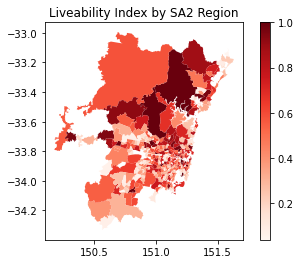

<Figure size 720x720 with 0 Axes>

In [31]:
# Visualization for original score
GSR = sa2[(sa2['GCC_NAME21']=='Greater Sydney')]
score_table = pd.read_sql( "SELECT * FROM score", con=conn)

# Join the sa2 file with index table
# Different data type fresh off SQL so need to change to str
score_table['SA2_CODE21'] = score_table['SA2_CODE21'].astype(str) 
GSR = GSR.merge(score_table, on="SA2_CODE21")

# Plot the Data Frame
GSR.plot(column='Score', cmap='Reds', legend=True)

# Title n Size
plt.title('Liveability Index by SA2 Region')
plt.figure(figsize=(10, 10))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

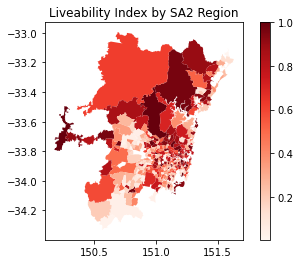

<Figure size 720x720 with 0 Axes>

In [32]:
# Visualization for score + added data
GSR = sa2[(sa2['GCC_NAME21']=='Greater Sydney')]
score_additional_table = pd.read_sql( "SELECT * FROM score_additional", con=conn)

# Join the sa2 file with index table
# Different data type fresh off SQL so need to change to str
score_additional_table['SA2_CODE21'] = score_additional_table['SA2_CODE21'].astype(str) 
GSR = GSR.merge(score_additional_table, on="SA2_CODE21")

# Plot the Data Frame
GSR.plot(column='Score', cmap='Reds', legend=True)

# Title n Size
plt.title('Liveability Index by SA2 Region')
plt.figure(figsize=(10, 10))
plt.show

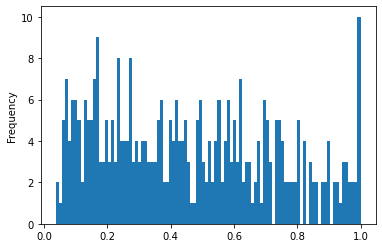

In [33]:
plot1 = score_table['Score'].plot.hist(bins=100)
plt.show()

### Importing Income dataset

In [34]:
income = pd.read_csv("Income.csv")
income = income[~income.isin(['np']).any(axis=1)]
income

,sa2_code,sa2_name,earners,median_age,median_income,mean_income
0,101021007,Braidwood,2426,50,44246,61745
1,101021008,Karabar,5128,42,62946,67345
2,101021009,Queanbeyan,6778,39,61724,67276
3,101021010,Queanbeyan - East,3360,40,64010,71770
4,101021011,Queanbeyan Region,13502,44,74042,85303
...,...,...,...,...,...,...
571,128021537,Royal National Park,13,36,38956,61645
572,128021538,Sutherland - Kirrawee,13698,41,62453,71105
573,128021607,Engadine,10335,43,60914,70158
574,128021608,Loftus - Yarrawarrah,4498,45,60469,73218


In [35]:
## income Table
conn.execute("""
DROP TABLE IF EXISTS income CASCADE;
CREATE TABLE income (
    sa2_code INTEGER PRIMARY KEY,
    sa2_name VARCHAR(43),
    earners INTEGER,
    median_age INTEGER,
    median_income INTEGER,
    mean_income INTEGER
);"""
)

In [36]:
income.to_sql("income", con=conn, if_exists='append', index=False)
query(conn, "select * from income")

,sa2_code,sa2_name,earners,median_age,median_income,mean_income
0,101021007,Braidwood,2426,50,44246,61745
1,101021008,Karabar,5128,42,62946,67345
2,101021009,Queanbeyan,6778,39,61724,67276
3,101021010,Queanbeyan - East,3360,40,64010,71770
4,101021011,Queanbeyan Region,13502,44,74042,85303
...,...,...,...,...,...,...
565,128021537,Royal National Park,13,36,38956,61645
566,128021538,Sutherland - Kirrawee,13698,41,62453,71105
567,128021607,Engadine,10335,43,60914,70158
568,128021608,Loftus - Yarrawarrah,4498,45,60469,73218


In [37]:
# Creating income_view associating SA2-Score-MedianIncome
sql = """
DROP VIEW IF EXISTS income_view;
CREATE VIEW income_view AS (
SELECT score."SA2_CODE21", score."SA2_NAME21", score."Score", median_income
FROM score
LEFT JOIN income ON (score."SA2_CODE21" = income.sa2_code)
GROUP BY score."SA2_CODE21", income.sa2_code, score."SA2_NAME21", score."Score"
)
"""
query(conn, sql)

query(conn, "SELECT * from income_view")


Error encountered: 
This result object does not return rows. It has been closed automatically.


,SA2_CODE21,SA2_NAME21,Score,median_income
0,102011028,Avoca Beach - Copacabana,0.273282,52450.0
1,102011029,Box Head - MacMasters Beach,0.330579,48724.0
2,102011030,Calga - Kulnura,0.994702,46228.0
3,102011031,Erina - Green Point,0.959298,48292.0
4,102011032,Gosford - Springfield,0.976856,51999.0
...,...,...,...,...
355,128021536,Oyster Bay - Como - Jannali,0.678751,64428.0
356,128021538,Sutherland - Kirrawee,0.630104,62453.0
357,128021607,Engadine,0.586025,60914.0
358,128021608,Loftus - Yarrawarrah,0.169741,60469.0


In [38]:
# Creating income_view associating SA2-SecondScore-MedianIncome
sql = """
DROP VIEW IF EXISTS income_view_additional;
CREATE VIEW income_view_additional AS (
SELECT score_additional."SA2_CODE21", score_additional."SA2_NAME21", score_additional."Score", median_income
FROM score_additional
LEFT JOIN income ON (score_additional."SA2_CODE21" = income.sa2_code)
GROUP BY score_additional."SA2_CODE21", income.sa2_code, score_additional."SA2_NAME21", score_additional."Score"
)
"""
query(conn, sql)

query(conn, "SELECT * from income_view_additional")

Error encountered: 
This result object does not return rows. It has been closed automatically.


,SA2_CODE21,SA2_NAME21,Score,median_income
0,102011028,Avoca Beach - Copacabana,0.305809,52450.0
1,102011029,Box Head - MacMasters Beach,0.197893,48724.0
2,102011030,Calga - Kulnura,0.968006,46228.0
3,102011031,Erina - Green Point,0.935951,48292.0
4,102011032,Gosford - Springfield,0.919039,51999.0
...,...,...,...,...
368,128021537,None,NaN,38956.0
369,128021538,Sutherland - Kirrawee,0.342275,62453.0
370,128021607,Engadine,0.803479,60914.0
371,128021608,Loftus - Yarrawarrah,0.062389,60469.0


In [39]:
query = "SELECT * FROM income_view"
correlation_incomescore = pd.read_sql_query(query, conn)
correlation_incomescore
correlation_incomescore.dropna(inplace=True)

# Calculate the correlation matrix
correlation = correlation_incomescore['Score'].corr(correlation_incomescore['median_income'])

# Print the correlation matrix
print('Correlation coefficient:', correlation)

Correlation coefficient: 0.19680628607428152


Coefficient: [5.42010408e-06]
Intercept: 0.1963449363371459
p-value: [6.89482458e-84]


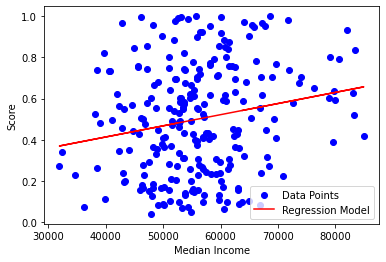

In [40]:
from sklearn.linear_model import LinearRegression
#!pip install statsmodels
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

x = correlation_incomescore[['median_income']].values
y = correlation_incomescore['Score'].values

# Linear model creation
regression_model = LinearRegression()
regression_model.fit(x, y)

# Coefficient + intercept of linear regression model
print('Coefficient:', regression_model.coef_)
print('Intercept:', regression_model.intercept_)
# Regression coefficient p-value for significance tests
reg_model1 = sm.OLS(y, x)
reg_result1 = reg_model1.fit()
print('p-value:', reg_result1.pvalues)

# SCatterplot of all the data values
plt.scatter(x, y, color='blue', label='Data Points')

# Plotting the linear regression line
plt.plot(x, regression_model.predict(x), color='red', label='Regression Model')

plt.xlabel('Median Income')
plt.ylabel('Score')
plt.legend()
plt.show()

In [41]:
query = "SELECT * FROM income_view_additional"
correlation_incomescore_additional = pd.read_sql_query(query, conn)
correlation_incomescore_additional.dropna(inplace=True)
correlation_incomescore_additional

correlation_additional = correlation_incomescore_additional['Score'].corr(correlation_incomescore_additional['median_income'])

print('Correlation coefficient:', correlation_additional)

Correlation coefficient: 0.23254239831215667


Coefficient: [7.57745042e-06]
Intercept: 0.05768569021161707
p-value: [2.24008481e-69]


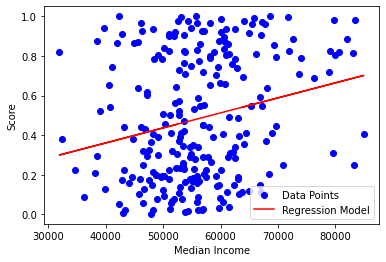

In [42]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

x = correlation_incomescore_additional[['median_income']].values
y = correlation_incomescore_additional['Score'].values

# Linear model creation
regression_model_additional = LinearRegression()
regression_model_additional.fit(x, y)

# Coefficient + intercept of linear regression model
print('Coefficient:', regression_model_additional.coef_)
print('Intercept:', regression_model_additional.intercept_)
# Regression coefficient p-value for significance tests
reg_model2 = sm.OLS(y, x)
reg_result2 = reg_model2.fit()
print('p-value:', reg_result2.pvalues)


# Scatterplot of all the data values
plt.scatter(x, y, color='blue', label='Data Points')

# Plotting the linear regression line
plt.plot(x, regression_model_additional.predict(x), color='red', label='Regression Model')

plt.xlabel('Median Income')
plt.ylabel('Score')
plt.legend()
plt.show()




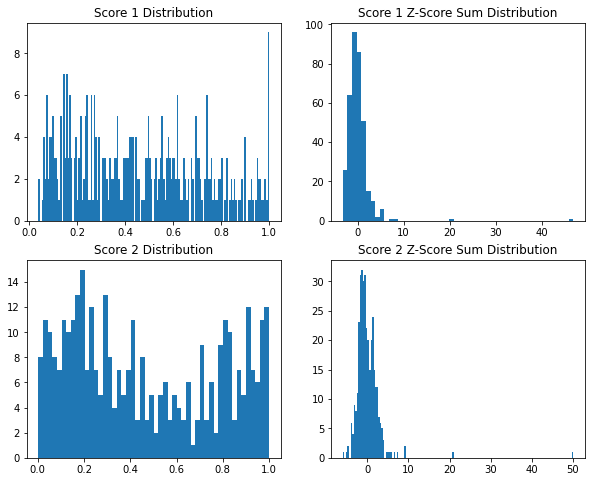

In [43]:
# Plotting for Score and Z-Score Sum distribution

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].hist(score_table['Score'], bins=150)
axs[0, 0].set_title('Score 1 Distribution')

axs[0, 1].hist(score_table['Z-Score SUM'], bins=50)
axs[0, 1].set_title('Score 1 Z-Score Sum Distribution')

axs[1, 0].hist(score_additional_table['Score'], bins=50)
axs[1, 0].set_title('Score 2 Distribution')

axs[1, 1].hist(score_additional_table['Z-Score SUM'], bins=150)
axs[1, 1].set_title('Score 2 Z-Score Sum Distribution')



# Display the plots
plt.show()

In [44]:
# That is all :)

In [45]:
# Data for score analysis discussions :)
print(score_table[score_table['Score']>0.5]) # sum of z-scores >0
print(score_table[score_table['Score']<0.5]) # sum of z-scores <0

print(score_additional_table[score_additional_table['Score']>0.5]) # sum of z-scores >0
print(score_additional_table[score_additional_table['Score']<0.5]) # sum of z-scores <0

    SA2_CODE21                          SA2_NAME21  Z-Score SUM     Score
0    117031644      Sydney (North) - Millers Point    46.876211  1.000000
1    117011320                         Banksmeadow    20.458586  1.000000
2    115021297  Dural - Kenthurst - Wisemans Ferry     7.902283  0.999630
3    117031645          Sydney (South) - Haymarket     7.650670  0.999525
4    121011684                    Chatswood - East     5.783317  0.996931
..         ...                                 ...          ...       ...
149  115011558                         Cherrybrook     0.049315  0.512326
150  117031639                         Chippendale     0.048646  0.512159
151  121011399  Chatswood (West) - Lane Cove North     0.021872  0.505468
152  125031484    Guildford West - Merrylands West     0.018572  0.504643
153  119021362                  Belmore - Belfield     0.002609  0.500652

[154 rows x 4 columns]
    SA2_CODE21                    SA2_NAME21  Z-Score SUM     Score
154  126021498  Glad

In [46]:
#conn.close()
#db.dispose()